# 3.4 Classification activity 

Read the activity description in the course notes and then use this template to help you answer the questions by completing the code in the cells marked ## TODO.



In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Sklearn functionality
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Convenience functions.  This can be found on the course github
from functions import *

# Define the task
Predict which passengers on the Titanic survive and comment on the features that best predict survival.

# Load the data
Load our clean data from titanic_clean.csv.

In [24]:
df = pd.read_csv("titanic_clean.csv")

## Inspect the data
Describe the shape (rows and columns) of the data:

In [25]:
df.shape

(891, 21)

Show the first 5 rows of the data:

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Show the data types of each column:

In [27]:
df.dtypes

Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Sex_female        int64
Sex_male          int64
Embarked_C        int64
Embarked_Q        int64
Embarked_S        int64
Embarked_nan      int64
Deck_A            int64
Deck_B            int64
Deck_C            int64
Deck_D            int64
Deck_E            int64
Deck_F            int64
Deck_G            int64
Deck_T            int64
Deck_nan          int64
dtype: object

Check for nulls in any column:

In [29]:
df.isna().mean()

Survived        0.0
Pclass          0.0
Age             0.0
SibSp           0.0
Parch           0.0
Fare            0.0
Sex_female      0.0
Sex_male        0.0
Embarked_C      0.0
Embarked_Q      0.0
Embarked_S      0.0
Embarked_nan    0.0
Deck_A          0.0
Deck_B          0.0
Deck_C          0.0
Deck_D          0.0
Deck_E          0.0
Deck_F          0.0
Deck_G          0.0
Deck_T          0.0
Deck_nan        0.0
dtype: float64

## Understand the data

### Compute descriptive stats
Compute the descriptive stats

In [30]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,...,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,...,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualise
Show a correlation matrix plot (use the correlationMatrix() function in functions.py).

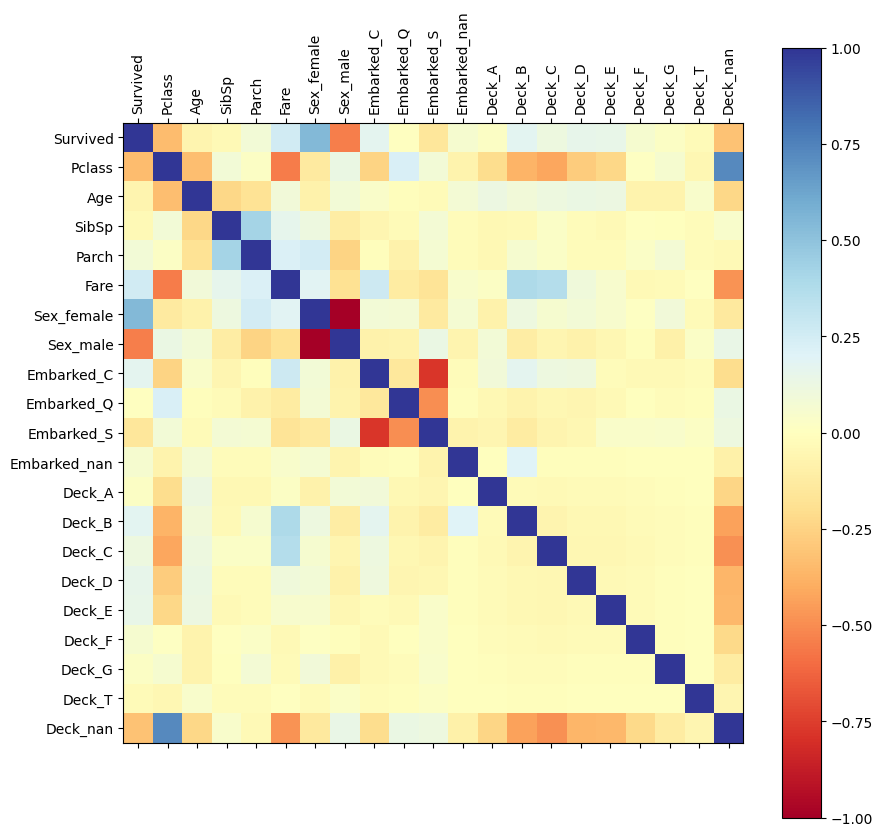

In [31]:
correlationMatrix(df)

## Prepare Data

### Select features and split into input and target features
Split the features into X (the input features) and y (the target feature).

In [32]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan'],
      dtype='object')

In [33]:
y = df["Survived"]
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan']]

In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


###  Scale features
Use the MinMaxScaler to scale the X features.  Confirm the scaling using the describe() function.

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaled_X, columns=X.columns)
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,0.418036,0.163383,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Models

### Split into test and training sets
Split the X and y data into training and test sets.  Use a seed of 27 and 33% for the test sample size

In [39]:
seed = 27
test_sample_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sample_size, random_state=seed)


### Create multiple models, fit them and check them
Create and fit a decision tree classifier.

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

Create and fit a logistic regression classifier.

In [42]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

Check the decision trees model by computing its accuracy score using the **training** data.

In [ ]:
predictions_dt = dt_model.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(y_train, predictions_dt))

DecisionTreeClassifier 0.988255033557047


Check the logistic regression model by computing its accuracy score using the **training** data.

In [44]:
predictions_lr = lr_model.predict(X_train)
print("LogisticRegressionClassifier", accuracy_score(y_train, predictions_lr))

LogisticRegressionClassifier 0.802013422818792


## Evaluate the models
Compute the accuracy score for the decision trees model using the **test** data.

In [45]:
predictions_dt = dt_model.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(y_test, predictions_dt))

DecisionTreeClassifier 0.7559322033898305


Compute the accuracy score for the logistic regression model using the **test** data.

In [46]:
predictions_lr = lr_model.predict(X_test)
print("LogisticRegressionClassifier", accuracy_score(y_test, predictions_lr))

LogisticRegressionClassifier 0.7932203389830509


### Choose the best performing model

In [ ]:
model=lr_model

## Inspect the models
Inspect the logistic regression model using the logisticRegressionSummary() function in functions.py.

In [19]:
## TODO

Inspect the decision trees model using the decisionTreesSummary() function in functions.py.

In [20]:
## TODO